Training set: (341, 30)
Validation set: (114, 30)
Test set: (114, 30)
AUC: 0.9853896103896104
Optimal threshold (validation set): 0.5487367572271269


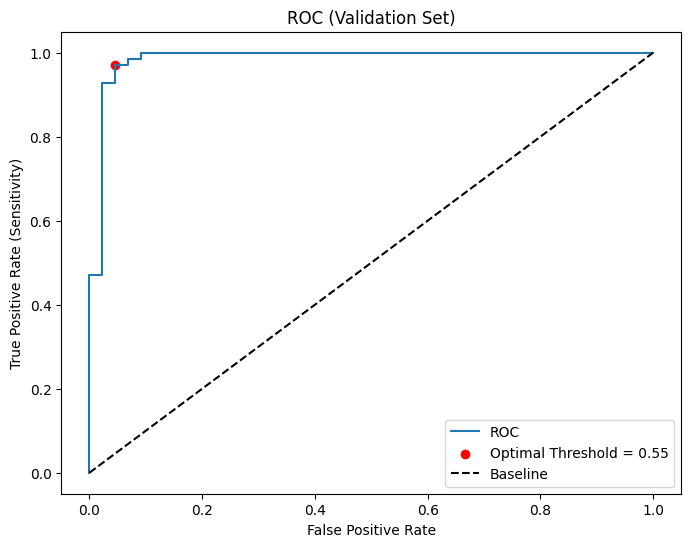

Accuracy:     0.965
Precision:    0.959
Recall (Sensitivity): 0.986
F1-Score:     0.972
Specificity:  0.930


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_curve, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score, confusion_matrix)

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Split data: 60% train, 20% validation, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

# Train model
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)

# Evaluate on validation set
probs_val = logistic_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, probs_val)
auc_val = roc_auc_score(y_val, probs_val)
print("AUC:", auc_val)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold (validation set):", optimal_threshold)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC")
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red',
            label=f"Optimal Threshold = {optimal_threshold:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC (Validation Set)")
plt.legend()
plt.show()

# Evaluate on test set using optimal threshold
probs_test = logistic_model.predict_proba(X_test)[:, 1]
y_pred_test = (probs_test >= optimal_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
specificity = tn / (tn + fp)

print("Accuracy:     {:.3f}".format(accuracy))
print("Precision:    {:.3f}".format(precision))
print("Recall (Sensitivity): {:.3f}".format(recall))
print("F1-Score:     {:.3f}".format(f1))
print("Specificity:  {:.3f}".format(specificity))


Regresja logistyczna to metoda, która na podstawie liniowej kombinacji cech i funkcji sigmoidalnej generuje prawdopodobieństwa przynależności do klasy. Domyślnie używa się progu 0,5, co oznacza, że jeśli wyjście funkcji jest większe lub równe 0,5, przypisujemy etykietę 1, a w przeciwnym razie 0. Próg 0,5 nie zawsze jest najlepszym wyborem, zależy on od konkretnego problemu, kosztów błędów oraz tego, jakie metryki są najważniejsze w danym zadaniu.

Na zbiorze danych raka piersi uzyskano wyniki przy optymalnym progu około 0,55:

Accuracy: 0.965  
Precision: 0.959  
Recall/Sensitivity: 0.986  
F1-Score: 0.972  
Specificity: 0.930  

Na zbiorze walidacyjnym:

AUC: 0.9853896103896104  
Optymalny próg: 0.5487367572271269

----------

 1. **Czy inny próg dałby lepsze wyniki?**  
Przesunięcie progu wpływa na to, jak model klasyfikuje.  
- Obniżenie progu < 0,5:
   więcej przypadków zostanie zaklasyfikowanych jako pozytywne, co podnosi czułość, ale zwiększa ryzyko fałszywie pozytywnych wyników.  
- Podniesienie progu > 0,5:
   zmniejsza liczbę fałszywych pozytywnych przypadków (poprawia swoistość), ale może spowodować, że model przegapi niektóre prawdziwe pozytywne przypadki (spada czułość).

Wyniki pokazały, że przesunięcie progu do około 0,55 daje bardzo wysoką czułość (0,986) i dobrą swoistość (0,930), co prowadzi do wysokiej precyzji (0,959) oraz F1-Score (0,972). To oznacza, że zmiana progu poprawia wyniki modelu, lepiej dostosowując go do specyfiki danych.

----------

 2. **Jak definiujemy „lepsze” wyniki?**  
W medycynie, ważne jest, aby jak najwięcej pozytywnych przypadków (aby nie przeoczyć chorego pacjenta) zostało wykrytych (wysoka czułość), nawet jeśli oznacza to większą liczbę fałszywych ostrzeżeń. Ale w filtrowaniu spamu kluczowa jest wysoka swoistość, aby nie zaklasyfikować ważnych wiadomości jako spam.
Najlepszy próg to taki, który najlepiej odpowiada priorytetom danego zadania. Czyli lepsze wyniki oznaczają osiągnięcie dobrej równowagi między dokładnością, precyzją, czułością, F1-Score i swoistością. W naszym przypadku optymalny próg (~0,55) zapewnił bardzo dobre wyniki we wszystkich tych metrykach, w kontekście diagnostyki raka, bardzo wysoka czułość (0,986) jest najważniejsza, a uzyskana swoistość (0,930) dodatkowo potwierdza dobrą jakość modelu.

----------
 3. **Jak krzywa ROC pomaga w tym procesie?**  
Krzywa ROC (Receiver Operating Characteristic) przedstawia zależność między czułością (True Positive Rate) a fałszywym pozytywnym wskaźnikiem (False Positive Rate, czyli 1 – swoistość) dla różnych progów.
ROC pokazuje, jak zmiana progu wpływa na czułość oraz fałszywy pozytywny wskaźnik (1 – swoistość) dla różnych ustawień progu.  Dzięki ROC możemy zobaczyć, jak przesunięcie progu zmienia punkt na wykresie, co pozwala łatwo ocenić równowagę między czułością a swoistością.

----------
 4. **Jak wybrać optymalny próg korzystając z krzywej ROC?**

Obniżenie progu powoduje, że więcej obserwacji zostanie zaklasyfikowanych jako pozytywne, co zwiększa czułość.
Podniesienie progu sprawia, że mniej negatywnych obserwacji jest błędnie klasyfikowanych jako pozytywne, co zwiększa swoistość.

Kompromis - zmiana progu wpływa bezpośrednio na macierz błędów (decyduje, ile przypadków zostanie sklasyfikowanych jako pozytywne lub negatywne), wybór optymalnego progu zależy od tego, które błędy (fałszywe pozytywy lub fałszywe negatywy) są w danym zadaniu bardziej kosztowne.
Metody wyboru optymalnego progu:
1) wybór punktu najbliższego górnemu lewemu narożnikowi wykresu
2) maksymalizacja indeksu Youdena (czułość + swoistość − 1). W naszym przypadku analiza ROC doprowadziła do wyboru progu około 0,55.

----------

 5. **Czym jest metryka AUC i dlaczego jest przydatna?**  
Area Under the Curve to pole pod krzywą ROC, które mierzy ogólną zdolność modelu do rozróżniania między klasami. Oznacza to, że AUC pokazuje, jak dobrze model rozróżnia pozytywne i negatywne przypadki, niezależnie od wybranego progu.

AUC jest niezależne od progu, co czyni je wiarygodną miarą ogólnej wydajności modelu.
Wyższe wartości AUC (maksymalnie 1) oznaczają lepszą zdolność rozróżniania klas, co jest pomocne przy porównywaniu różnych modeli lub strategii progowych.
W naszym przypadku AUC wynosi około 0,985, co świadczy o bardzo dobrej jakości modelu.

----------
materiały:
https://scikit-learn.org/1.1/auto_examples/model_selection/plot_roc.html

https://sigmaquality.pl/uncategorized/ustawienie-progow-w-modelu-regresji-logistycznej/

https://www.dremio.com/wiki/area-under-the-curve/

https://www.listendata.com/2014/08/learn-area-under-curve-auc.html
